In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
!pip install PyAstronomy
from PyAstronomy.pyasl import foldAt
import pdb

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.5/745.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 9.5 MB/s eta 0:00:00
  Created wheel for PyAstronomy: filename=PyAstronomy-0.19.0-py3-none-any.whl size=518887 sha256=d95befd2363afc7e6fc9cb7b5d46f307d651767208ba46f44679b307802df1e5
  Stored in directory: /root/.cache/pip/wheels/1b/7f/55/5ba823273eadfdaf9b83dda88ebc3118a6b74315388a45ff0a
Successfully built PyAstronomy


In [ ]:
# Find the standard deviation for a given period and number of bins

def find_stdev(bjds, mags, period, numbins):
  t0 = min(bjds)
  bins = []
  for i in range(numbins):
    bins.append([])
  for j in range(len(bjds)):
    bjd = bjds[j]
    phase = ((bjd-t0) % period) / period
    for i in range(numbins):
      min_phase = float(i/numbins)
      max_phase = float((i+1)/numbins)
      if phase >= min_phase and phase < max_phase:
        bins[i].append(mags[j])
  stdev_sum = 0
  for i in range(numbins):
    mags = bins[i]
    stdev = np.std(mags)
    #print(stdev)
    stdev_sum += stdev

  return(stdev_sum)

In [ ]:
#compute the power spectrum

def compute_power_spectrum(datafile, period2, num_periods, numbins, title):
  bjds, mags = [], []
  with open(datafile, "r") as f:
    for line in f:
      bjd, calmag = line.strip().split(",")
      bjds.append(float(bjd))
      mags.append(float(calmag))
  min_period = period2 - 0.15
  max_period = period2 + 0.15
  increment = (max_period - min_period) / num_periods
  periods = []
  for i in range(num_periods):
    period = min_period + (i*increment)
    periods.append(period)
  stdevs = []
  min_stdev = 10000
  best_period = 0
  for period in periods:
    stdev = find_stdev(bjds, mags, period, numbins)
    stdevs.append(stdev)
    if stdev < min_stdev:
      best_period = period
      min_stdev = stdev
  best_period = round(best_period, 4)
  print(min_stdev)

#CHANGE THIS TSV
  M13 = np.loadtxt("/content/V54-(DC) - V.tsv")
  MJD = M13[:,0]
  calibrated_mag = M13[:,1]
  T0 = 0
  phases = foldAt(MJD, 0.3091, T0)
  #plotting!
  title = "V54 V period: " + str(0.3091)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5,3), gridspec_kw = {'width_ratios': [1.2,1.5]})
  fig.suptitle(title)
  #plt.gca().invert_yaxis()
  ax1.plot(periods, stdevs, color = "black", linewidth = 0.2)
  ax1.axvline(best_period, color= "red", linewidth= 0.8, label= "period guess")
  ax1.set_xlabel('Period')
  ax1.set_ylabel('Standard Deviation')
  ax1.legend()

  plt.gca().invert_yaxis()
  plt.xlabel("Phase")
  plt.ylabel("Magnitude")
  ax2.yaxis.tick_right()
  plt.xticks(np.arange(0,1.25,0.25))
  plt.grid(True)
  plt.ylim(15.2,14.6)
  ax2.scatter(phases, calibrated_mag, color = "black", s = 3)
  plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.48760480118000865


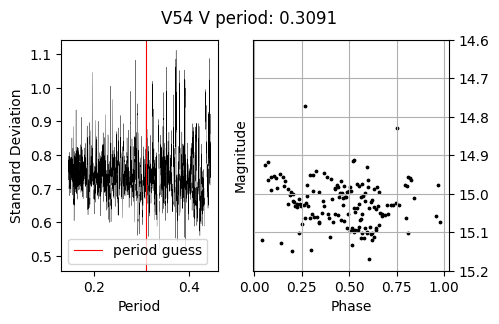

In [ ]:
#files = [ "/content/V8-(DC) - IP.csv", ]
#periods = [0.7503]
#titles = ["V8 IP"]
files = ["/content/V54-(DC) - V.csv"]
periods = [0.2954]
titles = ["V8 IP"]

for i in range(len(files)):
  compute_power_spectrum(files[i], periods[i], 3000, 10, titles[i])